### SVM_Naive_Bayes

#### Disciplina Inteligência Artificial

#### Prof: José Humberto Cruvinel

#### Nome dos alunos:

* Samara de Jesus Duarte


Neste jupyter vamos criar 4 modelos SVM (Support Vector Machine) e um modelo Naive Bayes para classificar espécies de flores Iris.

Dataset: https://archive.ics.uci.edu/ml/datasets/iris

Este jupyter notebook deve ser executado no Google Colab (https://colab.research.google.com/) 

In [25]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn import svm
%matplotlib inline 

## Carregando o dataset

In [26]:
# Importando o dataset iris
from sklearn.datasets import load_iris
iris = load_iris()
# Convertendo para dataframe do Pandas
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
# Adicionando as colunas Target e Target_Name
df['Target'] = iris.target
df['Target_Name'] = df.apply(lambda row: iris.target_names[int(row.Target)], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Target_Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Explorando os dados

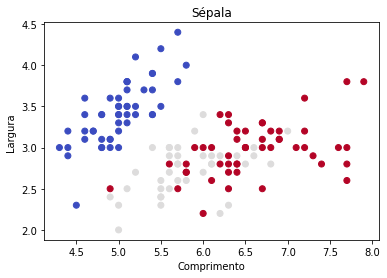

In [27]:
# Visualizando a relação sépala
def visualize_sepal_data():
    X = iris.data[:, :2]  
    y = iris.target
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Comprimento')
    plt.ylabel('Largura ')
    plt.title('Sépala')
    plt.show()
 
visualize_sepal_data()

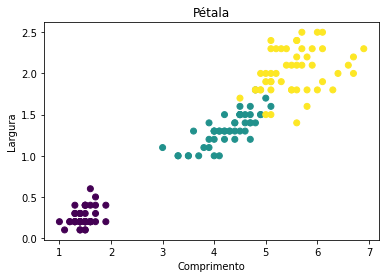

In [28]:
# Visualizando a relação de pétalas
def visuvalize_petal_data():
    X = iris.data[:, 2:]  # we only take the last two features.
    y = iris.target
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel('Comprimento')
    plt.ylabel('Largura')
    plt.title('Pétala')
    plt.show()
 
visuvalize_petal_data()

## Separando dados de X e y

In [29]:
# Vamos separar as variáveis (X) do resultado (y)
X = df.iloc[:,:-2]
y = df['Target'].values
# Imprimindo o Shape de X e y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


## Uso de SVM (Suport Vector Machine)

In [30]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.2, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (120, 4)
y_train: (120,)
X_test: (30, 4)
y_test: (30,)


In [31]:
!pip install scikit-plot
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scikitplot.metrics import plot_roc
# Criando funcao para imprimir resultados
def show_results(model, X_test, y_test):
  # Modelo 1
  y_pred = model.predict(X_test)
  print('Shape y_pred:',y_pred.shape)
  # Imprimindo o Score para os dados de teste
  print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)
  # Medidas de desempenho
  print("Accuracy:",accuracy_score(y_pred,y_test))
  print("Precision:",precision_score(y_pred,y_test,average='weighted'))
  print("Recall:",recall_score(y_pred,y_test,average='weighted'))
  print("F1 Score:",f1_score(y_pred,y_test,average='weighted'))
  # Imprimindo a matriz de confusão
  plot_confusion_matrix(model, X_test, y_test)
  try:
    plt.show()
    # Plotando a curva ROC para os dados de teste
    y_probas = model.predict_proba(X_test)
    plot_roc(y_test, y_probas, figsize=(10, 8))   
    plt.show()
  except AttributeError:
    print('ROC indisponivel')

Shape y_pred: (30,)
Accuracy is  93.33333333333333
Accuracy: 0.9333333333333333
Precision: 0.9444444444444445
Recall: 0.9333333333333333
F1 Score: 0.9330303030303031


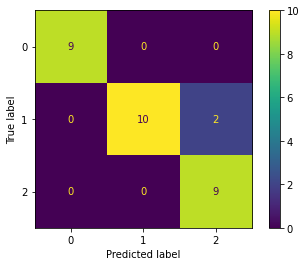

ROC indisponivel


In [32]:
# Criando 4 modelos diferentes de SVM (Suport Vector Machine)
svm_1 = svm.SVC(kernel='linear').fit(X_train, y_train)
show_results(svm_1, X_test, y_test)

Shape y_pred: (30,)
Accuracy is  96.66666666666667
Accuracy: 0.9666666666666667
Precision: 0.9694444444444444
Recall: 0.9666666666666667
F1 Score: 0.9665141113653699


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


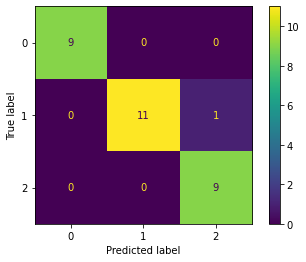

ROC indisponivel


In [33]:
svm_2 = svm.LinearSVC().fit(X_train, y_train)
show_results(svm_2, X_test, y_test)

Shape y_pred: (30,)
Accuracy is  93.33333333333333
Accuracy: 0.9333333333333333
Precision: 0.9444444444444445
Recall: 0.9333333333333333
F1 Score: 0.9330303030303031


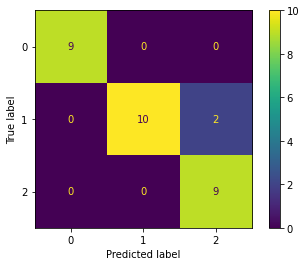

ROC indisponivel


In [34]:
svm_3 = svm.SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)
show_results(svm_3, X_test, y_test)

Shape y_pred: (30,)
Accuracy is  93.33333333333333
Accuracy: 0.9333333333333333
Precision: 0.9444444444444445
Recall: 0.9333333333333333
F1 Score: 0.9330303030303031


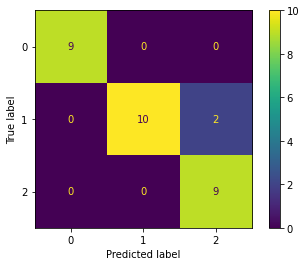

ROC indisponivel


In [35]:
svm_4 = svm.SVC(kernel='poly', degree=3).fit(X_train, y_train)
show_results(svm_4, X_test, y_test)

## Uso de Naive Bayes

Shape y_pred: (30,)
Accuracy is  96.66666666666667
Accuracy: 0.9666666666666667
Precision: 0.9694444444444444
Recall: 0.9666666666666667
F1 Score: 0.9665141113653699


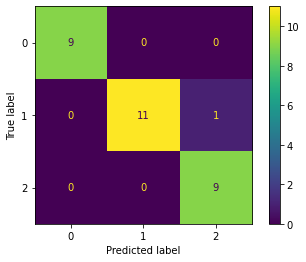

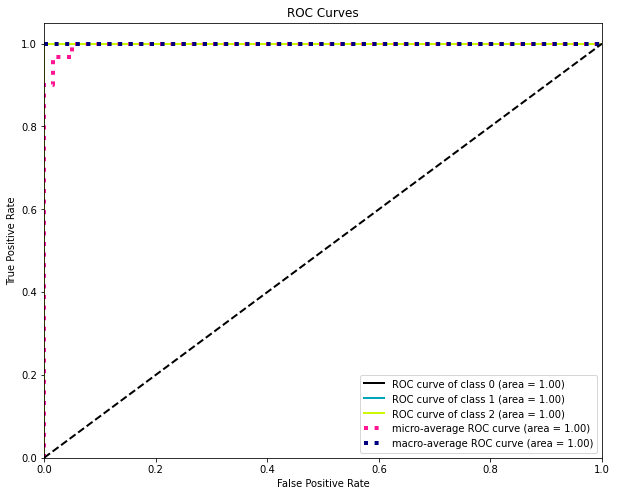

In [36]:
# Agora vamos comparar com Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X, y)
show_results(nb, X_test, y_test)

# Exercício SVM e Naive Bayes

Neste exercício vamos utilizar SVM e Naive Bayes para problemas de classificação.

Aplique SVM e Naive Bayes para os datasets Wine e Câncer de mama;

Gere dois novos notebooks com as respostas:

* **SVM_Naive_Bayes_01.ipynb** (dataset wine)
* **SVM_Naive_Bayes_02.ipynb** (dataset câncer de mama)


FIM